# 0.0 - Imports

In [1]:
import pandas as pd
from sklearn import cluster as ct
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import numpy as np

/home/aderaldo/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1.0 - Load Dataset

In [5]:
X = pd.read_csv("/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/clusterização/X_dataset.csv")

In [6]:
X.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963


# 2.0 - Training

## 2.1 - Fine Tuning

In [3]:
clusters = np.arange( 2, 11, 1 )
ss_list = []

for c in clusters:
    # define
    kmeans = ct.KMeans( n_clusters=c, random_state= 0 )
    # fit
    labels = kmeans.fit_predict( X )
    # performance
    ss_avg = mt.silhouette_score( X, labels )
    # add silhouette to list
    ss_list.append( ss_avg )

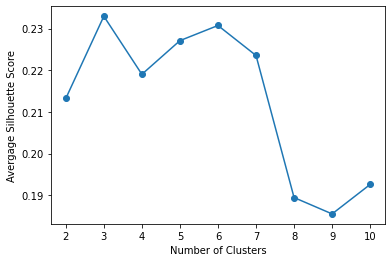

In [4]:
plt.plot( clusters, ss_list, marker='o' )
plt.xlabel( 'Number of Clusters' );
plt.ylabel( 'Avergage Silhouette Score' );

In [19]:
max(ss_list)

0.23295918228054466

# 3.0 - Plot

In [16]:
best_kmeans = ct.KMeans( n_clusters=3, random_state= 0 )
labels = best_kmeans.fit_predict( X )

In [18]:
len( labels )

178

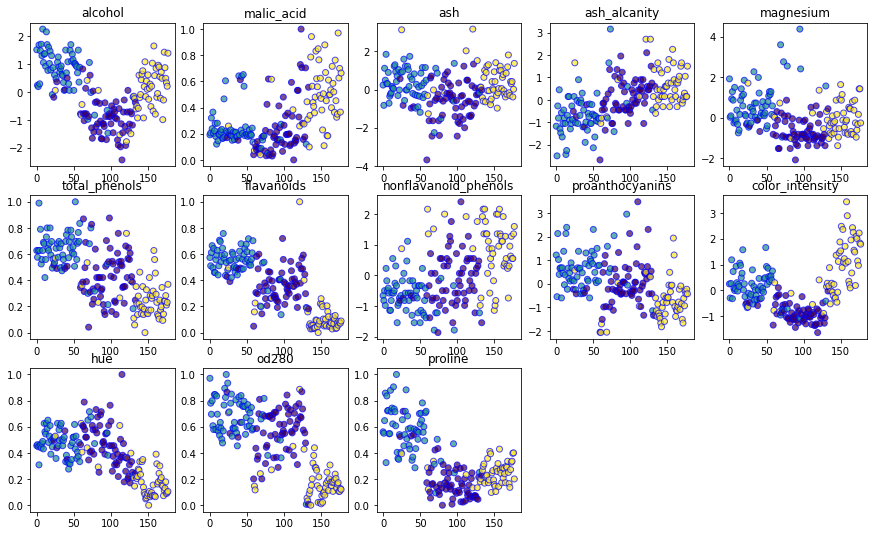

In [17]:
plt.figure( figsize=(15, 9) )
name = X.columns.tolist()
for p in range( len( name ) ):
    plt.subplot( 3, 5, p+1 )
    plt.scatter( range(len(X)), X.loc[:, name[p] ], alpha=0.7, edgecolors='b', c=best_kmeans.labels_ )
    plt.title( name[p] )